In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def make_coordinates (image, line_parameters):
  slope, intercept = line_parameters
  y1 = image.shape [0]
  y2 = int(y1*(3/5))
  x1 = int((y1 - intercept)/slope)
  x2 = int((y2 - intercept)/slope)
  return np.array([x1, y1, x2, y2])

In [ ]:
def average_slope_intercept(image, lines):
  left_fit = []
  right_fit = []
  for line in lines:
    x1, y1, x2, y2 = line.reshape(4)
    parameters = np.polyfit((x1, x2), (y1, y2), 1)
    slope = parameters[0]
    intercept = parameters[1]
    if slope < 0:
      left_fit.append((slope, intercept))
    else:
      right_fit.append((slope, intercept))
  left_fit_average = np.average(left_fit, axis=0)
  right_fit_average = np.average(right_fit, axis=0)
  left_line = make_coordinates(image, left_fit_average)
  right_line = make_coordinates(image, right_fit_average)
  return np.array([left_line, right_line])

In [ ]:
def canny(image):
  gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  blur= cv2.GaussianBlur(gray, (5, 5),0)
  canny = cv2.Canny(blur, 50, 150)
  return canny

In [ ]:
def display_lines(image, lines):
  line_image= np.zeros_like(image)
  if lines is not None:
    for x1,y1,x2,y2 in lines:
      cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
  return line_image

In [ ]:
def region_of_interest(image):
  height =image.shape[0]
  polygons = np.array([
  [(200, height ), (1100, height), (550, 250)]
  ])
  mask = np.zeros_like(image)
  cv2.fillPoly(mask, polygons, 255)
  masked_image = cv2.bitwise_and(image, mask)
  return masked_image

In [ ]:
from google.colab.patches import cv2_imshow

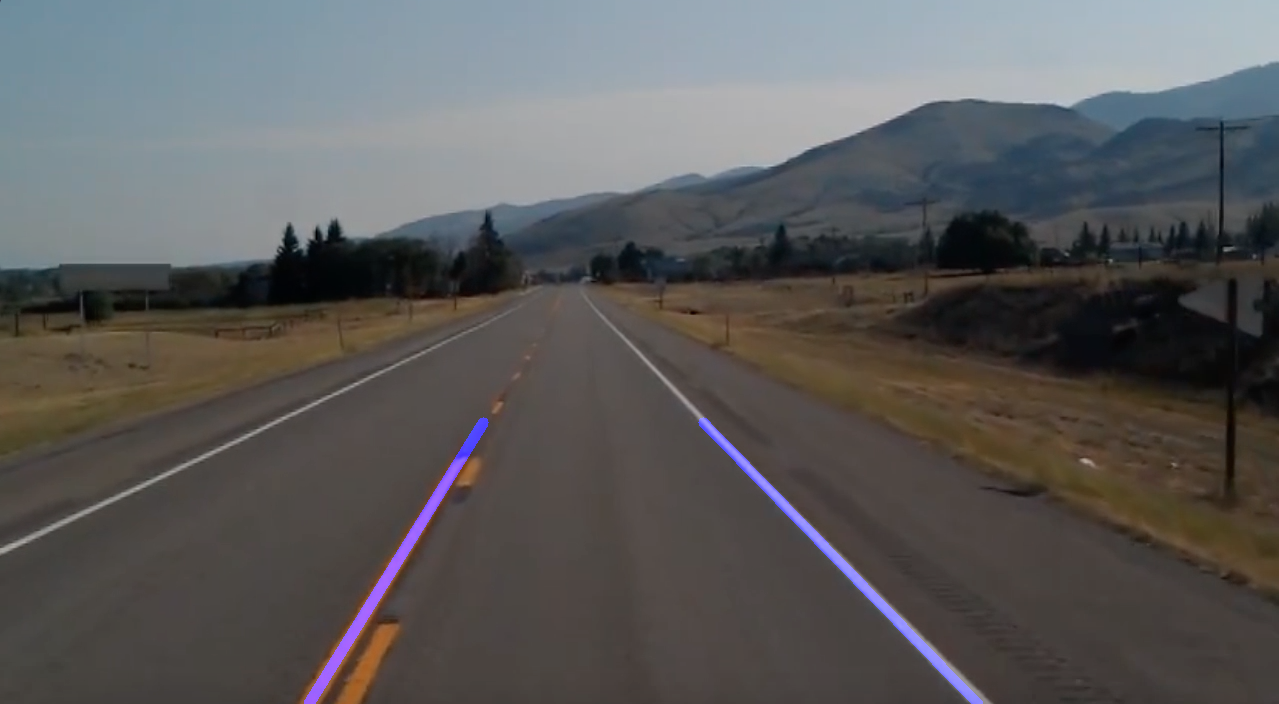

-1

In [ ]:
image= cv2.imread("/content/test_image.jpg")
lane_image = np.copy(image)
canny_image = canny(lane_image)
cropped_image = region_of_interest(canny_image)
lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
averaged_lines = average_slope_intercept(lane_image, lines)
line_image = display_lines(lane_image, averaged_lines) 
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)
cv2_imshow(combo_image)
cv2.waitKey(0)
#plt.imshow(line_image)
#plt.show()

In [ ]:
cap = cv2.VideoCapture("/content/test2.mp4")
while(cap.isOpened()):
  _,frame = cap.read()
  canny_image = canny(frame)
  cropped_image = region_of_interest(canny_image)
  lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
  averaged_lines = average_slope_intercept(frame, lines)
  line_image = display_lines(frame, averaged_lines) 
  combo_image = cv2.addWeighted(frame, 0.8, line_image, 1, 1)
  cv2_imshow(combo_image)
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break
cap.release()
cv2.destroyAllWindows()